``Naive Linear Regression``

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import autograd

RAND = 12345
np.random.seed(RAND)

<AxesSubplot:ylabel='Density'>

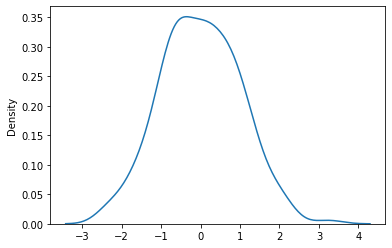

In [2]:
# let's prepare the dataset
X, y = make_regression(n_samples=200, noise=15, n_features=1, random_state=RAND)
sns.kdeplot(X[:,0])                  # check if guassain looking

In [3]:
print(X.shape, y.shape)

#  simple train test split to evaluate model
X_train, X_test  = X[:150], X[150:]
y_train, y_test = y[:150], y[150:]

(200, 1) (200,)


In [4]:
def rmse(targets, preds):
    
    targets = np.array(targets)
    preds = np.array(preds)
    
    sq_error = np.power(targets-preds, 2)
    mse = np.mean(sq_error)
    
    return np.sqrt(mse)

In [5]:

class My_LinearRegression:
    
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.wts = None
        self.bias = None
        self.is_fit = False
        
    def fit(self, X, y):
        n_samples, n_fts = X.shape
        train_loss = []
        # randomly initialize wts and bias
        self.wts = np.random.rand(n_fts)
        self.bias = np.random.rand(1)
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.wts) + self.bias  # returns pred for every sample
            loss = rmse(y_pred, y)
            train_loss.append(loss)
            
            # find grads of loss(mse) w.r.t wts and bias
            dw = (1/n_samples)  *  np.dot((y_pred - y), X)
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # update wts 
            self.wts -= dw*self.lr
            self.bias -= db*self.lr
                  
        self.is_fit = True
            

    def predict(self, X):
        if self.is_fit:
            preds = np.dot(X, self.wts) + self.bias
            return preds
        else:
            raise Exception('You have to train the model first')

In [6]:
my_reg = My_LinearRegression(0.1)
my_reg.fit(X_train, y_train)

In [7]:
my_reg.wts

array([34.2410762])

In [8]:
my_preds = my_reg.predict(X_test)
rmse(y_test, my_preds)

14.222531428703789

In [9]:
my_preds

array([ 9.07213257e+00, -4.79629284e+01,  4.39209715e+01, -7.84654899e+01,
        5.66176808e+00,  2.44749658e+01,  1.68334933e+01,  2.83988823e+01,
        3.47278833e+01,  2.96403986e+01,  2.21945850e+01, -8.04752639e+00,
        4.58785298e+01,  2.78039356e-02,  4.97468214e+01,  4.67592864e+01,
       -6.81042577e+01, -2.19072774e+01, -9.47663878e+00,  1.75131153e+01,
       -3.56358515e+00,  5.75831807e+01,  1.53341439e+01, -1.48381322e-01,
       -5.31101773e+01, -1.97507349e+01,  2.82661095e+00,  4.66505839e+01,
       -3.45339716e+01,  6.29196491e+01, -1.85948458e+01,  4.64474515e+01,
       -5.70153857e+01,  4.51774476e+01, -2.80256337e+01, -3.70478662e-01,
        1.83684772e+01,  9.84996740e+00,  7.98366541e+00, -8.07755196e-01,
        4.22065083e+01, -7.67042443e+01,  4.24610095e+01,  1.18322204e+01,
        1.61143213e+01,  1.67664380e+01,  4.53696763e+00, -1.67922958e+01,
       -9.88459997e+00, -1.38467763e+01])

In [10]:
from sklearn.linear_model import LinearRegression as LR

lr = LR()
lr.fit(X_train, y_train)
sk_preds = lr.predict(X_test)
rmse(y_test, sk_preds)

14.22253142870379

In [11]:
lr.coef_

array([34.2410762])

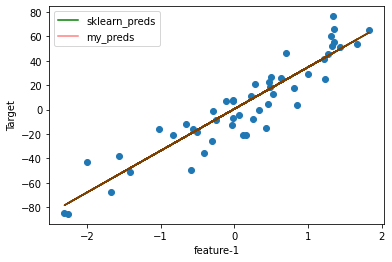

In [20]:
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], sk_preds, c='g', label='sklearn_preds')
plt.plot(X_test[:, 0], my_preds, c='r', alpha=0.5, label= 'my_preds')
plt.xlabel('feature-1')
plt.ylabel('Target')
plt.legend();